# Assignment 5
This week we're going to carry on from last week's work with the same groups and the same underlying data, Ann Arbor parking ticket data from here: https://github.com/cab938/a2tickets

## Hints
This assignment is long. You have a big team. Reduce the assignment by getting individuals to work on portions of it, they are intentionally loosley coupled and most of your work does not need to happen on the full `DataFrame` until the end.

Also, free riders who don't do their work exist. You unfortunatly have to deal what that through social protocols, this is a team effort. I recommend meeting up on Monday at the latest to determine who didn't get things done so you can recover before the deadline.

The person in your group who has the last name closest to the beginning of the alphabet should hand in the assignment. It should include a list of the uniqunames of everyone in your group.

Finally, all of these questions assume you have some reasonably cleaned `DataFrame` from Assignment 4, so feel free to reuse that cleaning code here.

## Question 1 (10%)
Write one line of python which returns a new `DataFrame` of the average and standard deviation of the fines assessed per state.

In [30]:
import numpy as np
import pandas as pd
def load_ticket_data():
    parking15 = pd.read_excel('AnnArbor-TicketViolation2015.xls', skiprows=[0], sheet_name=None)
    parking16 = pd.read_excel('AnnArbor-TicketViolation2016.xls', skiprows=[0], sheet_name=None)
    parking17 = pd.read_excel('AnnArbor-TicketViolation2017.xls', skiprows=[0], sheet_name=None)
    parking18 = pd.read_excel('AnnArbor-TicketViolation2018.xls', skiprows=[0], sheet_name=None)
    parking19 = pd.read_excel('AnnArbor-TicketViolation2019.xls', skiprows=[0], sheet_name=None)
    parking20 = pd.read_excel('AnnArbor-TicketViolation-jan2020.xls', skiprows=[0], sheet_name=None)
   
    all_df = [parking15, parking16, parking17, parking18, parking19, parking20]
    
    final_df = pd.DataFrame()
    
    for df in all_df:
        for sheet in range(1, (1 + len(df))):
            if(sheet == 1):
                 final_df = final_df.append(df[('Sheet' + str(sheet))], sort=True)
            else:
                df[('Sheet' + str(sheet))].columns = ['Ticket #', 'Badge', 'Issue Date ', 'IssueTime', 'Plate', 'State','Make', 'Model', 
                                                    'Violation', ' Description', 'Location', 'Meter',' Fine ', 'Penalty']
                final_df = final_df.append(df[('Sheet' + str(sheet))], sort=True)
                
    return final_df
df = load_ticket_data()

(df.groupby("State").agg({" Fine ": (np.nanmean, np.nanstd)})).head()

Fine            
         nanmean     nanstd
State                      
AB     18.145833   8.259075
AK     17.123967   9.138353
AL     19.101408  11.637369
AR     18.195572   8.390611
AZ     20.988409  14.056879

## Question 2 (10%)
Which parking meter makes the most money (total fine) for the city each year?

In [40]:
import datetime
ticket_data = load_ticket_data()
ticket_data["Year"] = pd.DatetimeIndex(ticket_data["Issue Date "]).year
grouped = ticket_data.groupby(['Year','Meter'], as_index=False).sum()
grouped.groupby(["Year"])[" Fine "].max()

Year
2015.0    13800.0
2016.0    18015.0
2017.0    10990.0
2018.0     3060.0
2019.0     2435.0
2020.0      245.0
Name:  Fine , dtype: float64

## Question 3 (10%)
Create a `DataFrame` which compares the make of car versus the state and calculates the average and standard deviation of fines. What conclusions might you draw from this, if any?

In [112]:
df = ticket_data.groupby(["Make", "State"])[" Fine "].agg({"Fine" : ["mean", "std"]})
df.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  """Entry point for launching an IPython kernel.


Fine          
            mean       std
Make State                
0152 MA     20.0  0.000000
0572 MA     15.0  7.071068
0712 MA     20.0  0.000000
0792 MA     20.0       NaN
1012 MA     20.0       NaN

## Question 4 (10%)
My buddy says that they marked the wrong vehicle make on his ticket so he's going to get out of his fine! I think he's lying to me, but I know he's gotten tickets before. Write a query which will find any individuals in the dataset who have gotten tickets with two different makes of cars. How many people are in this set?

In [9]:
df = load_ticket_data()

def multiple_makes(df):
    df = df.groupby(by='Plate', as_index=False).agg({'Make': pd.Series.nunique})
    df = df[df["Make"] == 2]
    count = df.shape[0]
    print("There are " + str(count) + " people in this set.")
    return df

multiple_makes(df).head()


There are 8931 people in this set.


,Plate,Make
10,00000,2
104,006A1DQ,2
281,021X256,2
293,0220J,2
308,023G493,2


## Question 5 (10%)
Someone told me that since Michigan is home to GM and Ford, domestic cars get smaller tickets written up. I wonder if this is true? Do cars which are from GM and Ford tend to get smaller fines and penalties (look at both) than those of Honda and Toyota?

Note: this requires you to come up with some descision as to what is a GM/Ford make and what is a Honda/Toyota make. You can choose this in any reasonable way you would like to, justify your choices in your answer.

In [10]:
df = load_ticket_data()

# For Michigan cars, I included everything owned by GMC or Ford that is based in Michigan, plus Chystler, Dodge, and Ram, which are also based in Michigan
# Ford, Chevrolet, GM, Dodge, GMC, Lincoln, Ram, Buick, Cadilac
mich_cars = ['FORD', "CHEV", "GMC", "DODG", "GMC", "LINC", "RAM", 'BUIC', 'CADI', 'CHRY']

# For Honda and Toyota I also included Lexus, Scion, and Acura, which are all owned by either Toyoto or Honda
# Lexus, Scion, Honda, Toyota, Acura
non_mich = ['LEXU', "SCIO", "HOND", "TOYO", "ACUR"]

mich_total_fine = 0
non_mich_total_fine = 0
mich_total_pen = 0
non_mich_total_pen = 0
for car in mich_cars:
    mich_total_fine += df.groupby("Make").agg({" Fine ": np.nanmean}).loc[car, " Fine "]
    mich_total_pen += df.groupby("Make").agg({"Penalty": np.nanmean}).loc[car, "Penalty"]
    
for car in non_mich:
    non_mich_total_fine += df.groupby("Make").agg({" Fine ": np.nanmean}).loc[car, " Fine "]
    non_mich_total_pen += df.groupby("Make").agg({"Penalty": np.nanmean}).loc[car, "Penalty"]

mich_avg_fine = mich_total_fine/len(mich_cars)
non_mich_avg_fine = non_mich_total_fine/len(non_mich)
mich_avg_pen = mich_total_pen/len(mich_cars)
non_mich_avg_pen = non_mich_total_pen/len(non_mich)
print("Michigan make average fine: " + str(mich_avg_fine))
print("Honda/Toyota make average fine: " + str(non_mich_avg_fine))
print("Michigan make average Penalty: " + str(mich_avg_pen))
print("Honda/Toyota make average Penalty: " + str(non_mich_avg_pen))

Michigan make average fine: 20.089071531776085
Honda/Toyota make average fine: 19.70941999202818
Michigan make average Penalty: 6.732094315065782
Honda/Toyota make average Penalty: 5.671573050803457


## Question 6 (5%)
I work at 205 South State Street. Provide for me an annual breakdown of the number of tickets which are given out on this block each year in one `DataFrame`.

In [13]:
df.head()

,Description,Fine,Badge,Issue Date,IssueTime,Location,Make,Meter,Model,Penalty,Plate,State,Ticket #,Violation
0,NO PRKNG ANYTME,35.0,36,2015-01-01,2214,525 ELM,SUBA,NaN,NaN,20.0,LAS5658,OH,H000210594,A04
1,EXPIRED METER,10.0,821,2015-01-02,824,600 BLK OF STATE SOU,FORD,4006A,NaN,0.0,DEZ4465,MI,2100005782,A01
2,EXPIRED METER,10.0,826,2015-01-02,1719,FARMER'S MARKET,SATU,17,NaN,0.0,DCM1327,MI,2110008524,A01
3,EXPIRED METER,10.0,826,2015-01-02,1725,FARMER'S MARKET,CHEV,35,NaN,0.0,BAX385,IA,2110008525,A01
4,NO PRKNG ANYTME,25.0,821,2015-01-02,1344,600 BLK OF WILLIAM E,FORD,NaN,NaN,0.0,2LEH1,MI,2100005834,A04


In [48]:
df = load_ticket_data()
df = df[df["Location"] == "200 BLK OF STATE SOU"]
df["Year"] = pd.DatetimeIndex(df["Issue Date "]).year
df["Year"].value_counts()

2019    1415
2017    1279
2015    1226
2016    1226
2018    1189
2020      77
Name: Year, dtype: int64

## Question 7 (5%)
The license plate for my car is `DLT7389`. How much has my family generously contributed to the city of Ann Arbor in the form of fines?

In [45]:
df = load_ticket_data()
new_df = df[df['Plate'] == 'DLT7389']
total = sum(new_df[' Fine '])
total

40.0

## Question 8 (5%)
In the whole dataset, who has contributed the most to the city of Ann Arbor in the form of fines?

In [113]:
df = load_ticket_data()
fines = df.groupby('Plate').agg({' Fine ': sum}).sort_values(' Fine ', ascending=False).head(1)

In [114]:
fines

,Fine
Plate,
CLA0416,13135.0


## Question 9 (15%)
It would be useful to have a column in the dataset which is called `is_vanity` which would be a `1` if the plate number was from Michigan and a vanity plate, and would be a `0` if it were from Michigan but were not a vanity plate, or was `NaN` if the vehicle was not from Michigan. Create this column using your logic (or an improvement of it) from Assignment 4, and the `Series.extract()` function.

Note: we **did not** cover this function in class, that's up to your group to figure out by reading the docs and experimenting!

In [111]:
mich = df.loc[df['State'] == "MI"]
is_not_vanity = df['Plate'].str.extract(r'([A-Z]{3}\d{4}\b)|([A-Z]{3}\d{3}\b)|(\d{3}[A-Z]{3}\b)', expand=False).isna()[0]

df['is_vanity'] = df.apply(lambda x: '', axis=1)
df['is_vanity'] = df['is_vanity'].where(df['State'] != 'MI', other=0)
df.loc[is_not_vanity, 'is_vanity'] = 1
df['is_vanity'] = df['is_vanity'].where(df['State'] == 'MI', other = np.nan)
df.head()

,Description,Fine,Badge,Issue Date,IssueTime,Location,Make,Meter,Model,Penalty,Plate,State,Ticket #,Violation,is_vanity
0,NO PRKNG ANYTME,35.0,36,2015-01-01,2214,525 ELM,SUBA,NaN,NaN,20.0,LAS5658,OH,H000210594,A04,NaN
1,EXPIRED METER,10.0,821,2015-01-02,824,600 BLK OF STATE SOU,FORD,4006A,NaN,0.0,DEZ4465,MI,2100005782,A01,0
2,EXPIRED METER,10.0,826,2015-01-02,1719,FARMER'S MARKET,SATU,17,NaN,0.0,DCM1327,MI,2110008524,A01,0
3,EXPIRED METER,10.0,826,2015-01-02,1725,FARMER'S MARKET,CHEV,35,NaN,0.0,BAX385,IA,2110008525,A01,NaN
4,NO PRKNG ANYTME,25.0,821,2015-01-02,1344,600 BLK OF WILLIAM E,FORD,NaN,NaN,0.0,2LEH1,MI,2100005834,A04,1


## Question 10 (15%)
Do you think that home game weekends generate more ticket revenue for the city or less? Using the Michigan football schedules from 2016 through 2019 calculate whether home game weekends have a different level of fines from away game weekends and report your results.

Note: I'm expecting a statistical analysis, e.g. a t-test, for full points.

In [68]:
df = load_ticket_data()
df["Year"] = pd.DatetimeIndex(df["Issue Date "]).year

In [77]:
home_2016 = ["2016-09-03", "2016-09-04", "2016-09-10", "2016-09-11", "2016-09-17", "2016-09-18", "2016-09-24", "2016-09-25", "2016-10-01", "2016-10-02", "2016-10-22","2016-10-23",
             "2016-11-05","2016-11-06", "2016-11-19", "2016-11-20"]
away_2016 = ["2016-10-08", "2016-10-09", "2016-10-29", "2016-10-30", "2016-11-12", "2016-11-13", "2016-11-26", "2016-11-27"]

home_2017 = ["2017-09-09", "2017-09-10", "2017-10-07", "2017-10-08", "2017-10-28", "2017-10-29", 
            "2017-11-04", "2017-11-05", "2017-11-25", "2017-11-26"]
away_2017 = ["2017-09-02", "2017-09-03", "2017-09-23", "2017-09-24", "2017-10-14", "2017-10-15", 
             "2017-10-21", "2017-10-22", "2017-11-11", "2017-11-12", "2017-11-18", "2017-11-19"]

home_2018 = ["2018-09-08", "2018-09-09", "2018-09-15", "2018-09-22", "2018-09-23", "2018-10-06", 
            "2018-10-07", "2018-10-13", "2018-10-14", "2018-11-03", "2018-11-04", "2018-11-17", "2018-11-18"]
away_2018 = ["2018-09-01", "2018-09-02", "2018-09-29", "2018-09-30", "2018-10-20", "2018-10-21", 
            "2018-11-10", "2018-11-11", "2018-11-24", "2018-11-25"]

home_2019 = ["2019-08-31", "2019-09-01", "2019-09-07", "2019-09-08", "2019-09-28", "2019-09-29", "2019-10-05", 
            "2019-10-06", "2019-10-26", "2019-10-27", "2019-11-16", "2019-11-17","2019-11-30", "2019-12-01"]
away_2019 = ["2019-09-21", "2019-09-22", "2019-10-12", "2019-10-13", "2019-10-19", "2019-10-20", 
            "2019-11-02", "2019-11-03", "2019-11-23", "2019-11-24"]

away = away_2016 + away_2017 + away_2018 + away_2019
home = home_2016 + home_2017 + home_2018 + home_2019

In [69]:
df = df[(df["Year"] == 2016.0) | (df["Year"] == 2017.0) | (df["Year"] == 2018.0) | (df["Year"] == 2019.0)]
df.head()

,Description,Fine,Badge,Issue Date,IssueTime,Location,Make,Meter,Model,Penalty,Plate,State,Ticket #,Violation,Year
0,EXPIRED METER,20.0,827,2016-01-02,1111,LOT 11,SATU,5A,NaN,0.0,A27VT,MI,2060009973,A01,2016.0
1,NO PRKNG ANYTME,25.0,827,2016-01-02,1304,200 BLK OF STATE SOU,HOND,NaN,NaN,0.0,DCZ5024,MI,2060009996,A04,2016.0
2,EXPIRED METER,20.0,827,2016-01-02,1302,900 BLK OF WASHINGTO,FORD,5066B,NaN,0.0,BEJ2048,MI,2060009995,A01,2016.0
3,EXPIRED METER,10.0,827,2016-01-02,1257,300 BLK OF THAYER SO,FORD,5088,NaN,0.0,DKQ9157,MI,2060009994,A01,2016.0
4,EXPIRED METER,20.0,827,2016-01-02,1254,700 BLK OF WASHINGTO,CHEV,5046,NaN,50.0,GJR3356,OH,2060009993,A01,2016.0


In [103]:
away_games = df[df["Issue Date "].isin(away)]
home_games = df[df["Issue Date "].isin(home)]
home_profit = home_games[" Fine "].sum() + home_games["Penalty"].sum()
away_profit = away_games[" Fine "].sum() + away_games["Penalty"].sum()
print("Total fines and penalties for home games: " + str(home_profit))
print("Total fines and penalties for away games: " + str(away_profit))
home_avg = home_games[" Fine "].mean() + home_games["Penalty"].mean()
away_avg = away_games[" Fine "].mean() + away_games["Penalty"].mean()
(home_avg, away_avg)

Total fines and penalties for home games: 481777.0
Total fines and penalties for away games: 148650.0


(28.568370493358636, 27.52268098500278)

In [107]:
from scipy import stats
stats.ttest_ind(home_games[" Fine "], away_games[" Fine "])

Ttest_indResult(statistic=3.623544562718215, pvalue=0.00029123985314567476)

In [108]:
print("The high TTest statistic indicates a difference in the fine amount (home games are higher) and the total money collected is substantially higher on home game weekends")

The high TTest statistic indicates a difference in the fine amount (home games are higher) and the total money collected is substantially higher on home game weekends


## Question 11 (5% - hard)
Create a "map of shame" whereby each of my (wife's!) tickets are mapped onto a map of Ann Arbor. You can use any API/method which you think is reasonable, just describe and justify it here. 

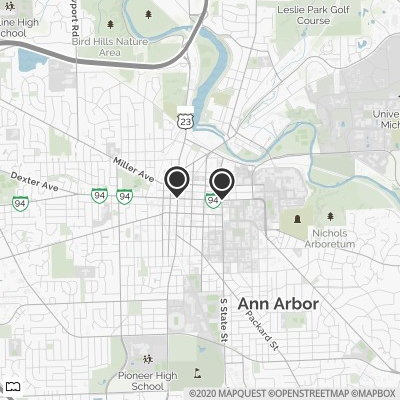

In [44]:
import requests
import numpy as np
df = load_ticket_data()
df = df[df['Plate'] == 'DLT7389']
def process_location(row):
    loc = row[1]['Location']
    if 'BLK OF' in row[1]['Location']:
        loc = "".join(row[1]['Location'].split("BLK OF "))
        if 'SOU' in loc:
            splt = loc.split()
            loc = splt[0] + " " + splt[-1][0] + " " + splt[1]
        if loc.split()[1] == "WASHINGTO":
            loc = loc.split()[0] + "WASHINGTON ST"
    return loc

lats = []
lons = []
locs = []
root_url = 'http://www.mapquestapi.com/geocoding/v1/address?key=ZGwuqQHu5PB6G2uOEAc3gNw3yT3iDAl1&maxResults=1&location='
for row in df.iterrows():
    loc = process_location(row)
    lat = requests.get(root_url + loc + ",Ann Arbor,MI").json()['results'][0]['locations'][0]['latLng']['lat']
    lng = requests.get(root_url + loc + ",Ann Arbor,MI").json()['results'][0]['locations'][0]['latLng']['lng']
    locs.append(str(lat) + "," + str(lng))
map_url = 'https://open.mapquestapi.com/staticmap/v5/map?key=ZGwuqQHu5PB6G2uOEAc3gNw3yT3iDAl1&zoom=13&locations='

r = requests.get(map_url + locs[0] + "||" + locs[1] + "||" + locs[2] + "||" + locs[3])
from io import BytesIO
from PIL import Image
img = Image.open(BytesIO(r.content))
img